In [1]:
!pip install mysql-connector



In [5]:
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import pearsonr,ttest_ind, f_oneway
warnings.filterwarnings('ignore')

In [7]:
db = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "Srinu@180903",
    database = "education_domain",
    auth_plugin='mysql_native_password',
    use_pure = True
)

mycursor = db.cursor()

print(db)



In [9]:
mycursor.execute("select * from student_details")
output=mycursor.fetchall()
for x in output:
    print(x)
    

(1, 'Anil', 'Patil', 'Rahul Patil', datetime.date(1999, 2, 17), 'Male', None, '9876543201', 'House No 21, Guntur, Andhra Pradesh', datetime.date(2018, 3, 30), 'BCom', 'Active', 'Yes', datetime.date(2023, 11, 12), 61716)
(2, 'Deepa', 'Patil', 'Ajay Patil', datetime.date(1996, 8, 14), 'Male', None, '9876543202', 'House No 41, Visakhapatnam, Andhra Pradesh', datetime.date(2021, 11, 9), 'BTech', 'Inactive', 'No', datetime.date(2026, 12, 23), 91609)
(3, 'Sita', 'Naidu', 'Vikram Naidu', datetime.date(1999, 5, 16), 'Female', None, '9876543203', 'House No 66, Mumbai, Andhra Pradesh', datetime.date(2017, 11, 21), 'Pharmacy', 'Inactive', 'Yes', datetime.date(2028, 3, 9), 40808)
(4, 'Rahul', 'Naidu', 'Vikram Naidu', datetime.date(1998, 11, 22), 'Female', None, '9876543204', 'House No 59, Pune, Andhra Pradesh', datetime.date(2020, 8, 26), 'BCA', 'Active', 'Yes', datetime.date(2028, 4, 30), 35722)
(5, 'Vikram', 'Yadav', 'Rahul Yadav', datetime.date(2000, 3, 17), 'Female', None, '9876543205', 'House

In [11]:
query="select * from student_details"
data=pd.read_sql(query,db)

In [13]:
data.head(5)


,Student_id,First_name,Last_name,Father_name,DOB,Gender,Phone_number,Aadhar_number,Address,Enrollment_date,course,Student_status,Scholorship_status,date_of_graduation,Course_fee_per_year
0,1,Anil,Patil,Rahul Patil,1999-02-17,Male,None,9876543201,"House No 21, Guntur, Andhra Pradesh",2018-03-30,BCom,Active,Yes,2023-11-12,61716
1,2,Deepa,Patil,Ajay Patil,1996-08-14,Male,None,9876543202,"House No 41, Visakhapatnam, Andhra Pradesh",2021-11-09,BTech,Inactive,No,2026-12-23,91609
2,3,Sita,Naidu,Vikram Naidu,1999-05-16,Female,None,9876543203,"House No 66, Mumbai, Andhra Pradesh",2017-11-21,Pharmacy,Inactive,Yes,2028-03-09,40808
3,4,Rahul,Naidu,Vikram Naidu,1998-11-22,Female,None,9876543204,"House No 59, Pune, Andhra Pradesh",2020-08-26,BCA,Active,Yes,2028-04-30,35722
4,5,Vikram,Yadav,Rahul Yadav,2000-03-17,Female,None,9876543205,"House No 8, Hyderabad, Andhra Pradesh",2019-05-10,BTech,Inactive,Yes,2024-06-18,77824


In [15]:
data.tail(5)

,Student_id,First_name,Last_name,Father_name,DOB,Gender,Phone_number,Aadhar_number,Address,Enrollment_date,course,Student_status,Scholorship_status,date_of_graduation,Course_fee_per_year
2995,2996,Kiran,Nair,Sneha Nair,2000-04-25,Female,None,9876546196,"House No 37, Hyderabad, Andhra Pradesh",2020-09-24,BDS,Graduated,No,2025-03-04,82446
2996,2997,Vikram,Nair,Vikram Nair,2003-10-27,Female,None,9876546197,"House No 22, Chennai, Andhra Pradesh",2016-08-09,BSc,Active,No,2024-12-05,36191
2997,2998,Deepa,Gupta,Ravi Gupta,1995-04-23,Male,None,9876546198,"House No 42, Delhi, Andhra Pradesh",2021-03-25,Pharmacy,Active,Yes,2027-04-12,53482
2998,2999,Kiran,Kumar,Deepa Kumar,2005-05-31,Male,None,9876546199,"House No 85, Mumbai, Andhra Pradesh",2019-11-05,BTech,Inactive,No,2026-12-22,88892
2999,3000,Sneha,Nair,Sneha Nair,2005-10-21,Male,None,9876546200,"House No 44, Bangalore, Andhra Pradesh",2022-12-23,BTech,Inactive,Yes,2027-07-11,84688


In [17]:
data.shape

(3000, 15)

In [19]:
data.describe

<bound method NDFrame.describe of       Student_id First_name Last_name   Father_name         DOB  Gender  \
0              1       Anil     Patil   Rahul Patil  1999-02-17    Male   
1              2      Deepa     Patil    Ajay Patil  1996-08-14    Male   
2              3       Sita     Naidu  Vikram Naidu  1999-05-16  Female   
3              4      Rahul     Naidu  Vikram Naidu  1998-11-22  Female   
4              5     Vikram     Yadav   Rahul Yadav  2000-03-17  Female   
...          ...        ...       ...           ...         ...     ...   
2995        2996      Kiran      Nair    Sneha Nair  2000-04-25  Female   
2996        2997     Vikram      Nair   Vikram Nair  2003-10-27  Female   
2997        2998      Deepa     Gupta    Ravi Gupta  1995-04-23    Male   
2998        2999      Kiran     Kumar   Deepa Kumar  2005-05-31    Male   
2999        3000      Sneha      Nair    Sneha Nair  2005-10-21    Male   

     Phone_number Aadhar_number                                  

In [21]:
data.max()

Student_id                                                   3000
First_name                                                 Vikram
Last_name                                                   Yadav
Father_name                                          Vikram Yadav
DOB                                                    2005-12-27
Gender                                                       Male
Phone_number                                                 None
Aadhar_number                                          9876546200
Address                House No 99, Visakhapatnam, Andhra Pradesh
Enrollment_date                                        2023-12-31
course                                                   Pharmacy
Student_status                                           Inactive
Scholorship_status                                            Yes
date_of_graduation                                     2028-12-31
Course_fee_per_year                                         99951
dtype: obj

In [23]:
data.min()



Student_id                                               1
First_name                                            Ajay
Last_name                                            Gupta
Father_name                                     Ajay Gupta
DOB                                             1995-01-01
Gender                                              Female
Phone_number                                          None
Aadhar_number                                   9876543201
Address                House No 1, Chennai, Andhra Pradesh
Enrollment_date                                 2015-01-02
course                                                  BA
Student_status                                      Active
Scholorship_status                                      No
date_of_graduation                              2023-01-02
Course_fee_per_year                                  30090
dtype: object

In [25]:
data.isnull().any()




Student_id             False
First_name             False
Last_name              False
Father_name            False
DOB                    False
Gender                 False
Phone_number            True
Aadhar_number          False
Address                False
Enrollment_date        False
course                 False
Student_status         False
Scholorship_status     False
date_of_graduation     False
Course_fee_per_year    False
dtype: bool

In [27]:
data.describe().T



,count,mean,std,min,25%,50%,75%,max
Student_id,3000.0,1500.500,866.169729,1.0,750.75,1500.5,2250.25,3000.0
Course_fee_per_year,3000.0,65215.077,20200.927410,30090.0,47694.00,65549.5,82566.75,99951.0


In [29]:
data.columns



Index(['Student_id', 'First_name', 'Last_name', 'Father_name', 'DOB', 'Gender',
       'Phone_number', 'Aadhar_number', 'Address', 'Enrollment_date', 'course',
       'Student_status', 'Scholorship_status', 'date_of_graduation',
       'Course_fee_per_year'],
      dtype='object')

In [31]:
data.index

RangeIndex(start=0, stop=3000, step=1)

In [33]:

data.index = list(data.index)


In [35]:
data.index


Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999],
      dtype='int64', length=3000)

In [37]:
data["course"].value_counts()

course
BDS         326
BA          307
BCom        306
BSc         304
BBA         299
LLB         295
BTech       292
Pharmacy    292
BCA         292
MBBS        287
Name: count, dtype: int64

In [39]:
d = (data[data['Student_id'] > 1000])
d



,Student_id,First_name,Last_name,Father_name,DOB,Gender,Phone_number,Aadhar_number,Address,Enrollment_date,course,Student_status,Scholorship_status,date_of_graduation,Course_fee_per_year
1000,1001,Kiran,Verma,Anil Verma,2002-06-05,Male,None,9876544201,"House No 68, Visakhapatnam, Andhra Pradesh",2020-03-11,MBBS,Inactive,No,2027-03-21,73873
1001,1002,Anil,Kumar,Vikram Kumar,2001-02-24,Male,None,9876544202,"House No 72, Delhi, Andhra Pradesh",2018-04-03,BDS,Graduated,Yes,2028-12-18,40163
1002,1003,Sneha,Yadav,Kiran Yadav,1998-05-02,Female,None,9876544203,"House No 45, Mumbai, Andhra Pradesh",2016-12-31,BCA,Graduated,No,2025-05-07,93421
1003,1004,Deepa,Gupta,Deepa Gupta,2000-01-24,Female,None,9876544204,"House No 28, Vijayawada, Andhra Pradesh",2021-07-01,BCom,Graduated,Yes,2023-09-19,67796
1004,1005,Rahul,Nair,Deepa Nair,1997-01-30,Male,None,9876544205,"House No 43, Kolkata, Andhra Pradesh",2019-01-07,BBA,Graduated,Yes,2026-02-09,68661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Kiran,Nair,Sneha Nair,2000-04-25,Female,None,9876546196,"House No 37, Hyderabad, Andhra Pradesh",2020-09-24,BDS,Graduated,No,2025-03-04,82446
2996,2997,Vikram,Nair,Vikram Nair,2003-10-27,Female,None,9876546197,"House No 22, Chennai, Andhra Pradesh",2016-08-09,BSc,Active,No,2024-12-05,36191
2997,2998,Deepa,Gupta,Ravi Gupta,1995-04-23,Male,None,9876546198,"House No 42, Delhi, Andhra Pradesh",2021-03-25,Pharmacy,Active,Yes,2027-04-12,53482
2998,2999,Kiran,Kumar,Deepa Kumar,2005-05-31,Male,None,9876546199,"House No 85, Mumbai, Andhra Pradesh",2019-11-05,BTech,Inactive,No,2026-12-22,88892


In [41]:
f = (data[data["Student_id"] == "Pharmacy"])
f

,Student_id,First_name,Last_name,Father_name,DOB,Gender,Phone_number,Aadhar_number,Address,Enrollment_date,course,Student_status,Scholorship_status,date_of_graduation,Course_fee_per_year


In [43]:
print(data.info())



<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Student_id           3000 non-null   int64 
 1   First_name           3000 non-null   object
 2   Last_name            3000 non-null   object
 3   Father_name          3000 non-null   object
 4   DOB                  3000 non-null   object
 5   Gender               3000 non-null   object
 6   Phone_number         0 non-null      object
 7   Aadhar_number        3000 non-null   object
 8   Address              3000 non-null   object
 9   Enrollment_date      3000 non-null   object
 10  course               3000 non-null   object
 11  Student_status       3000 non-null   object
 12  Scholorship_status   3000 non-null   object
 13  date_of_graduation   3000 non-null   object
 14  Course_fee_per_year  3000 non-null   int64 
dtypes: int64(2), object(13)
memory usage: 375.0+ KB
None


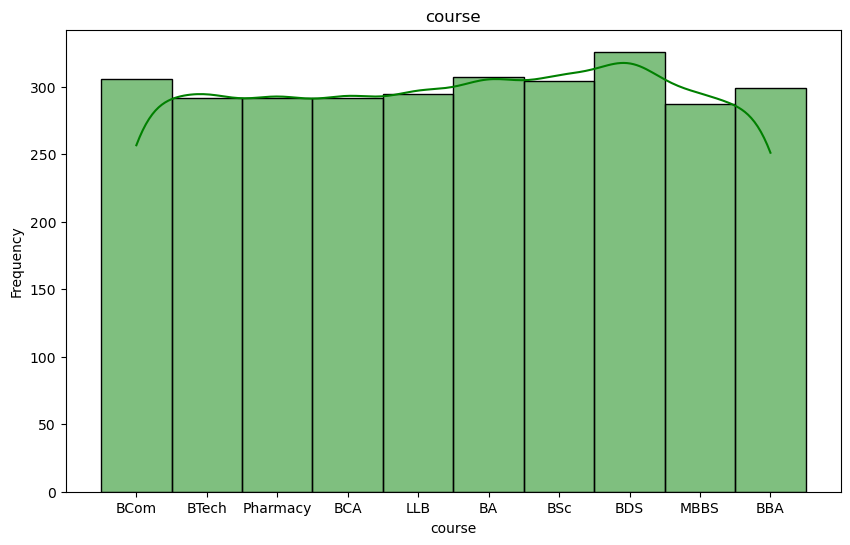

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(data['course'], kde=True, bins=10, color='GREEN')
plt.title('course')
plt.xlabel('course')
plt.ylabel('Frequency')
plt.show()

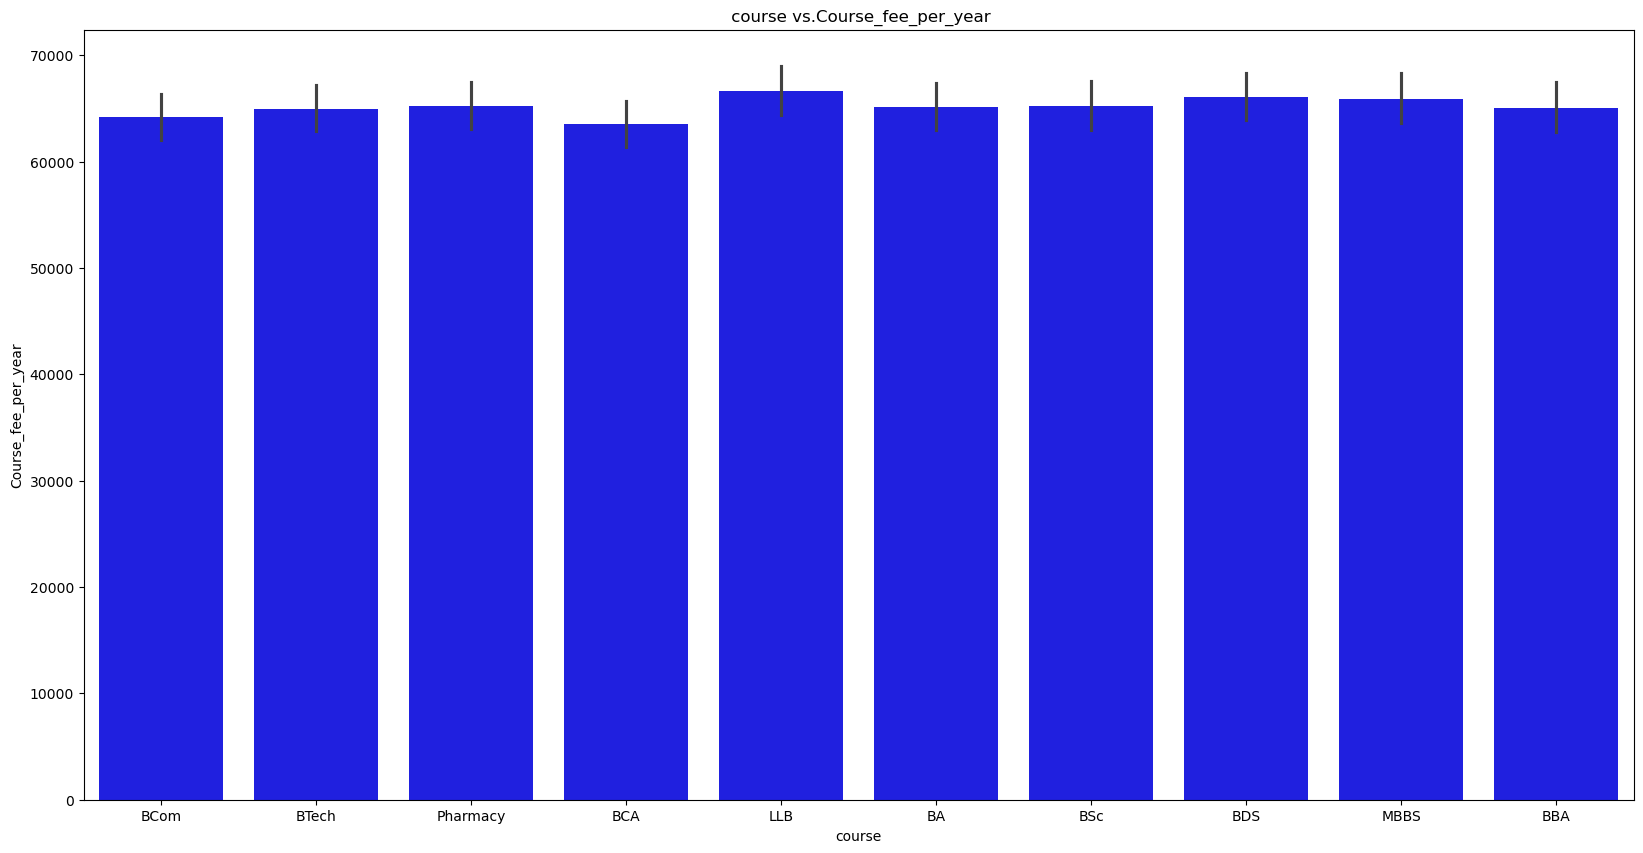

In [47]:
plt.figure(figsize=(20, 10))
sns.barplot(x=data['course'], y=data['Course_fee_per_year'], color='blue')
plt.title(' course vs.Course_fee_per_year')
plt.xlabel('course')
plt.ylabel('Course_fee_per_year')
plt.show()


<Axes: xlabel='course', ylabel='count'>

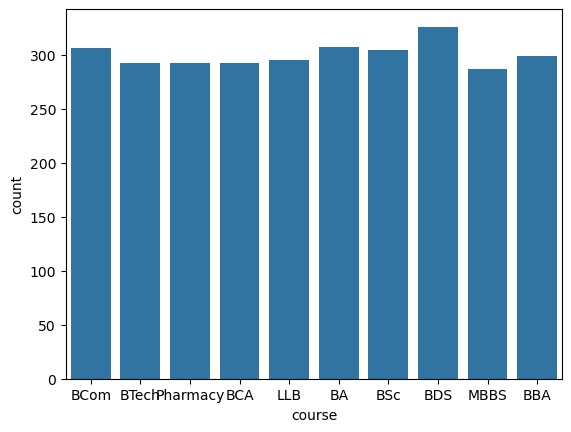

In [52]:
#1) What is the distribution of courses in the dataset?
data['course'].value_counts()
sns.countplot(x='course',data=data)



<Axes: xlabel='Scholorship_status', ylabel='count'>

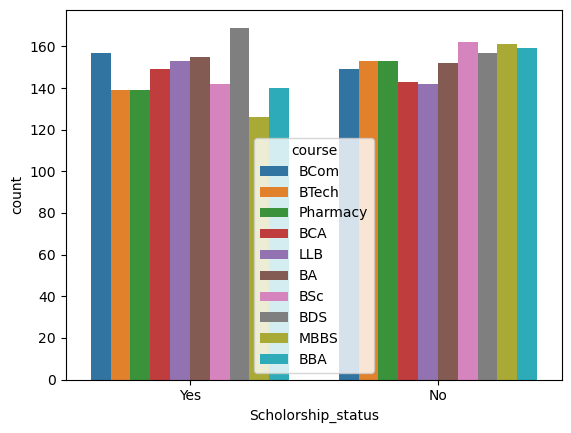

In [54]:
#2)How does the scholarship status vary across different courses?
sns.countplot(data,x="Scholorship_status",hue="course")

<Axes: xlabel='count', ylabel='course'>

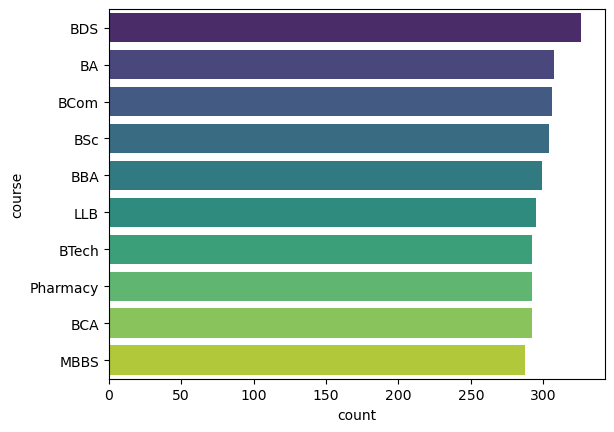

In [58]:
#3)What is the distribution of courses among students?
sns.countplot(data=data, y="course", order=data["course"].value_counts().index, palette="viridis")


<Axes: xlabel='Gender', ylabel='count'>

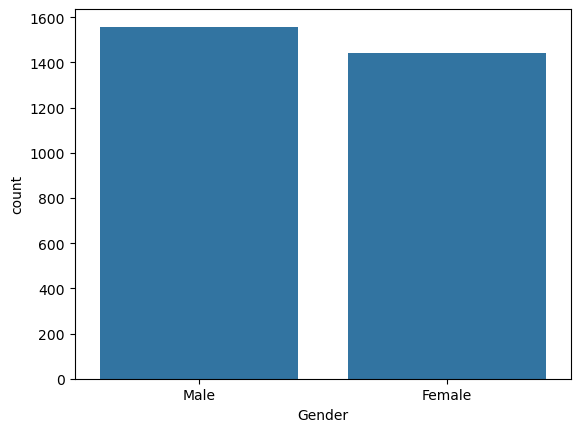

In [60]:
#4)What is the gender distribution of students?
sns.countplot(x='Gender',data=data)

In [64]:
data.columns

Index(['Student_id', 'First_name', 'Last_name', 'Father_name', 'DOB', 'Gender',
       'Phone_number', 'Aadhar_number', 'Address', 'Enrollment_date', 'course',
       'Student_status', 'Scholorship_status', 'date_of_graduation',
       'Course_fee_per_year'],
      dtype='object')

In [68]:
data.describe

<bound method NDFrame.describe of       Student_id First_name Last_name   Father_name         DOB  Gender  \
0              1       Anil     Patil   Rahul Patil  1999-02-17    Male   
1              2      Deepa     Patil    Ajay Patil  1996-08-14    Male   
2              3       Sita     Naidu  Vikram Naidu  1999-05-16  Female   
3              4      Rahul     Naidu  Vikram Naidu  1998-11-22  Female   
4              5     Vikram     Yadav   Rahul Yadav  2000-03-17  Female   
...          ...        ...       ...           ...         ...     ...   
2995        2996      Kiran      Nair    Sneha Nair  2000-04-25  Female   
2996        2997     Vikram      Nair   Vikram Nair  2003-10-27  Female   
2997        2998      Deepa     Gupta    Ravi Gupta  1995-04-23    Male   
2998        2999      Kiran     Kumar   Deepa Kumar  2005-05-31    Male   
2999        3000      Sneha      Nair    Sneha Nair  2005-10-21    Male   

     Phone_number Aadhar_number                                  

In [70]:
data.info

<bound method DataFrame.info of       Student_id First_name Last_name   Father_name         DOB  Gender  \
0              1       Anil     Patil   Rahul Patil  1999-02-17    Male   
1              2      Deepa     Patil    Ajay Patil  1996-08-14    Male   
2              3       Sita     Naidu  Vikram Naidu  1999-05-16  Female   
3              4      Rahul     Naidu  Vikram Naidu  1998-11-22  Female   
4              5     Vikram     Yadav   Rahul Yadav  2000-03-17  Female   
...          ...        ...       ...           ...         ...     ...   
2995        2996      Kiran      Nair    Sneha Nair  2000-04-25  Female   
2996        2997     Vikram      Nair   Vikram Nair  2003-10-27  Female   
2997        2998      Deepa     Gupta    Ravi Gupta  1995-04-23    Male   
2998        2999      Kiran     Kumar   Deepa Kumar  2005-05-31    Male   
2999        3000      Sneha      Nair    Sneha Nair  2005-10-21    Male   

     Phone_number Aadhar_number                                    

In [72]:
data.max()

Student_id                                                   3000
First_name                                                 Vikram
Last_name                                                   Yadav
Father_name                                          Vikram Yadav
DOB                                                    2005-12-27
Gender                                                       Male
Phone_number                                                 None
Aadhar_number                                          9876546200
Address                House No 99, Visakhapatnam, Andhra Pradesh
Enrollment_date                                        2023-12-31
course                                                   Pharmacy
Student_status                                           Inactive
Scholorship_status                                            Yes
date_of_graduation                                     2028-12-31
Course_fee_per_year                                         99951
dtype: obj

In [74]:
data.min()

Student_id                                               1
First_name                                            Ajay
Last_name                                            Gupta
Father_name                                     Ajay Gupta
DOB                                             1995-01-01
Gender                                              Female
Phone_number                                          None
Aadhar_number                                   9876543201
Address                House No 1, Chennai, Andhra Pradesh
Enrollment_date                                 2015-01-02
course                                                  BA
Student_status                                      Active
Scholorship_status                                      No
date_of_graduation                              2023-01-02
Course_fee_per_year                                  30090
dtype: object

In [76]:
data.isnull()

,Student_id,First_name,Last_name,Father_name,DOB,Gender,Phone_number,Aadhar_number,Address,Enrollment_date,course,Student_status,Scholorship_status,date_of_graduation,Course_fee_per_year
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2996,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2997,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2998,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [80]:
data.isna().sum()

Student_id                0
First_name                0
Last_name                 0
Father_name               0
DOB                       0
Gender                    0
Phone_number           3000
Aadhar_number             0
Address                   0
Enrollment_date           0
course                    0
Student_status            0
Scholorship_status        0
date_of_graduation        0
Course_fee_per_year       0
dtype: int64

In [84]:
#5)How many students have a scholarship status of 'Yes'?
import mysql.connector
import pandas as pd

# Connect to the MySQL database
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Srinu@180903",
    database="education_domain",
    auth_plugin='mysql_native_password',
    use_pure=True
)

# Execute the query
query = "SELECT COUNT(*) FROM student_details WHERE Scholorship_status = 'Yes'"
data = pd.read_sql(query, db)

# Display the result
print("Students with scholarship:", data.iloc[0, 0])

# Close the connection
db.close()



Students with scholarship: 1469
